<a href="https://colab.research.google.com/github/adithyabalakumar/EVA-4/blob/master/S12/S12_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys
import os 
workingdir = '/content/gdrive/My Drive/Colab Notebooks/S12'
sys.path.append(workingdir)

In [0]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [19]:
#Read COCO JSON File
fptr = open('/content/gdrive/My Drive/Colab Notebooks/S12/dog_coco.json')
data = json.load(fptr)
print(data.keys())

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])


In [0]:
#Extract Details
images_df = pd.DataFrame(data['images'], columns = data['images'][0].keys())
annotations_df = pd.DataFrame(data['annotations'], columns = data['annotations'][0].keys())

In [12]:
images_df.head()

,id,width,height,file_name,license,date_captured
0,0,382,478,dogs_00001.jpg,1,
1,1,321,260,dogs_00002.jpg,1,
2,2,320,271,dogs_00003.jpg,1,
3,3,327,499,dogs_00004.jpg,1,
4,4,350,260,dogs_00005.jpg,1,


In [23]:
annotations_df.head()

,id,image_id,category_id,segmentation,area,bbox,iscrowd
0,0,0,1,"[66, 33, 352, 33, 352, 449, 66, 449]",118976,"[66, 33, 286, 416]",0
1,1,1,1,"[62, 8, 299, 8, 299, 233, 62, 233]",53325,"[62, 8, 237, 225]",0
2,2,2,1,"[24, 11, 290, 11, 290, 237, 24, 237]",60116,"[24, 11, 266, 226]",0
3,3,3,1,"[29, 16, 309, 16, 309, 482, 29, 482]",130480,"[29, 16, 280, 466]",0
4,4,4,1,"[31, 16, 327, 16, 327, 210, 31, 210]",57424,"[31, 16, 296, 194]",0


In [0]:
#Extract the Box Dimensions
dogs_df = pd.concat([images_df, annotations_df], 1)[['file_name', 'width', 'height', 'bbox']]
x_list = []
y_list = []
w_list = []
h_list = [] 
for row in range(dogs_df.shape[0]):
  x = dogs_df['bbox'][row][0]
  y = dogs_df['bbox'][row][1]
  w = dogs_df['bbox'][row][2]
  h = dogs_df['bbox'][row][3]
  x_list.append(x)
  y_list.append(y)
  w_list.append(w)
  h_list.append(h)
box_df = pd.DataFrame(list(zip(x_list, y_list, w_list, h_list)), columns =['x', 'y', 'box_width', 'box_height'])
dogs_df = pd.concat([dogs_df, box_df], 1)
dogs_df = dogs_df.drop('bbox', axis =1)

In [25]:
dogs_df.head()

,file_name,width,height,x,y,box_width,box_height
0,dogs_00001.jpg,382,478,66,33,286,416
1,dogs_00002.jpg,321,260,62,8,237,225
2,dogs_00003.jpg,320,271,24,11,266,226
3,dogs_00004.jpg,327,499,29,16,280,466
4,dogs_00005.jpg,350,260,31,16,296,194


In [0]:
#Normalize the Box Dimensions based on Image Height and Width
dogs_df['x'] = dogs_df['x'] / dogs_df['width']
dogs_df['y'] = dogs_df['y'] / dogs_df['height']
dogs_df['box_width'] = dogs_df['box_width'] / dogs_df['width']
dogs_df['box_height'] = dogs_df['box_height'] / dogs_df['height']

In [27]:
dogs_df.head()

,file_name,width,height,x,y,box_width,box_height
0,dogs_00001.jpg,382,478,0.172775,0.069038,0.748691,0.870293
1,dogs_00002.jpg,321,260,0.193146,0.030769,0.738318,0.865385
2,dogs_00003.jpg,320,271,0.075000,0.040590,0.831250,0.833948
3,dogs_00004.jpg,327,499,0.088685,0.032064,0.856269,0.933868
4,dogs_00005.jpg,350,260,0.088571,0.061538,0.845714,0.746154


In [0]:
hw_array = dogs_df[["box_width", "box_height"]].to_numpy()

In [29]:
hw_array.shape

(54, 2)

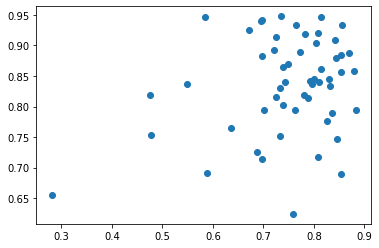

In [30]:
plt.scatter(hw_array[:,0], hw_array[:,1])

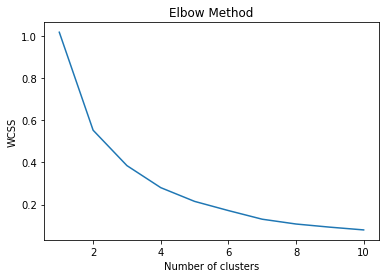

In [31]:
#Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(hw_array)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

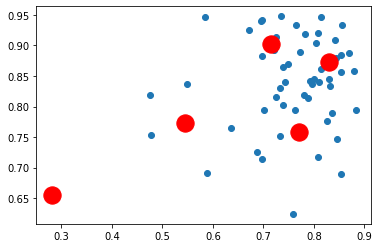

In [32]:
#Determine the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(hw_array)
plt.scatter(hw_array[:,0], hw_array[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()